In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [3]:
dataset = pd.read_csv("/Users/Datasets/codefordc-residential-cluster-data/commute_data_denorm.csv")

In [4]:
dataset.head()

,Unnamed: 0,school_code,school_name,cluster,count,cluster_str,school.year,schoolname,school_type,charter.status,...,grade.5,grade.6,grade.7,grade.8,grade.9,grade.10,grade.11,grade.12,lon,lat
0,1,1100,Achievement Preparatory Academy PCS,18.0,-1,Cluster 18,NaN,Achievement Preparatory Academy PCS,Regular school,True,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
1,2,1100,Achievement Preparatory Academy PCS,19.0,-1,Cluster 19,NaN,Achievement Preparatory Academy PCS,Regular school,True,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
2,3,1100,Achievement Preparatory Academy PCS,2.0,-1,Cluster 2,NaN,Achievement Preparatory Academy PCS,Regular school,True,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
3,4,1100,Achievement Preparatory Academy PCS,20.0,-1,Cluster 20,NaN,Achievement Preparatory Academy PCS,Regular school,True,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
4,5,1100,Achievement Preparatory Academy PCS,22.0,-1,Cluster 22,NaN,Achievement Preparatory Academy PCS,Regular school,True,...,True,True,True,True,False,False,False,False,-76.992532,38.833856


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5358 non-null   int64  
 1   school_code     5358 non-null   int64  
 2   school_name     5358 non-null   object 
 3   cluster         5134 non-null   float64
 4   count           5358 non-null   int64  
 5   cluster_str     5358 non-null   object 
 6   school.year     0 non-null      float64
 7   schoolname      5094 non-null   object 
 8   school_type     5094 non-null   object 
 9   charter.status  5094 non-null   object 
 10  school_address  5068 non-null   object 
 11  prek.3          5094 non-null   object 
 12  prek.4          5094 non-null   object 
 13  preschool       5094 non-null   object 
 14  kindergarten    5094 non-null   object 
 15  grade.1         5094 non-null   object 
 16  grade.2         5094 non-null   object 
 17  grade.3         5094 non-null   o

# Treating Missing Value

In [6]:
dataset.isna().sum()

Unnamed: 0           0
school_code          0
school_name          0
cluster            224
count                0
cluster_str          0
school.year       5358
schoolname         264
school_type        264
charter.status     264
school_address     290
prek.3             264
prek.4             264
preschool          264
kindergarten       264
grade.1            264
grade.2            264
grade.3            264
grade.4            264
grade.5            264
grade.6            264
grade.7            264
grade.8            264
grade.9            264
grade.10           264
grade.11           264
grade.12           264
lon                300
lat                300
dtype: int64

In [7]:
newDatatset = dataset.drop(["school.year","schoolname"],axis=1)

In [8]:
newDatatset = newDatatset[newDatatset['cluster_str']!='UNENCODABLE']

In [9]:
newDatatset

,Unnamed: 0,school_code,school_name,cluster,count,cluster_str,school_type,charter.status,school_address,prek.3,...,grade.5,grade.6,grade.7,grade.8,grade.9,grade.10,grade.11,grade.12,lon,lat
0,1,1100,Achievement Preparatory Academy PCS,18.0,-1,Cluster 18,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
1,2,1100,Achievement Preparatory Academy PCS,19.0,-1,Cluster 19,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
2,3,1100,Achievement Preparatory Academy PCS,2.0,-1,Cluster 2,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
3,4,1100,Achievement Preparatory Academy PCS,20.0,-1,Cluster 20,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
4,5,1100,Achievement Preparatory Academy PCS,22.0,-1,Cluster 22,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,True,False,False,False,False,-76.992532,38.833856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,5353,861,Youth Services Center,37.0,-1,Cluster 37,Regular school,False,1000 Mt Olivet Rd NE,False,...,False,False,True,True,True,True,True,True,-76.988586,38.911648
5353,5354,861,Youth Services Center,38.0,-1,Cluster 38,Regular school,False,1000 Mt Olivet Rd NE,False,...,False,False,True,True,True,True,True,True,-76.988586,38.911648
5354,5355,861,Youth Services Center,39.0,-1,Cluster 39,Regular school,False,1000 Mt Olivet Rd NE,False,...,False,False,True,True,True,True,True,True,-76.988586,38.911648
5355,5356,861,Youth Services Center,8.0,-1,Cluster 8,Regular school,False,1000 Mt Olivet Rd NE,False,...,False,False,True,True,True,True,True,True,-76.988586,38.911648


In [10]:
datasetArray = newDatatset['cluster_str'].to_numpy()
cluster_number = []
cluster_string = []
for i in datasetArray:
    catVal,numVal= i.split(' ')
    cluster_number.append(int(numVal))
    cluster_string.append(catVal)



In [11]:
newDatatset['cluster_number']=cluster_number

newDatatset.head()

,Unnamed: 0,school_code,school_name,cluster,count,cluster_str,school_type,charter.status,school_address,prek.3,...,grade.6,grade.7,grade.8,grade.9,grade.10,grade.11,grade.12,lon,lat,cluster_number
0,1,1100,Achievement Preparatory Academy PCS,18.0,-1,Cluster 18,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,18
1,2,1100,Achievement Preparatory Academy PCS,19.0,-1,Cluster 19,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,19
2,3,1100,Achievement Preparatory Academy PCS,2.0,-1,Cluster 2,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,2
3,4,1100,Achievement Preparatory Academy PCS,20.0,-1,Cluster 20,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,20
4,5,1100,Achievement Preparatory Academy PCS,22.0,-1,Cluster 22,Regular school,True,908 Wahler Pl SE,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,22


In [12]:
newDatatset.columns

Index(['Unnamed: 0', 'school_code', 'school_name', 'cluster', 'count',
       'cluster_str', 'school_type', 'charter.status', 'school_address',
       'prek.3', 'prek.4', 'preschool', 'kindergarten', 'grade.1', 'grade.2',
       'grade.3', 'grade.4', 'grade.5', 'grade.6', 'grade.7', 'grade.8',
       'grade.9', 'grade.10', 'grade.11', 'grade.12', 'lon', 'lat',
       'cluster_number'],
      dtype='object')

In [13]:
newDataset=newDatatset.drop(['Unnamed: 0','cluster', 'school_name', 'cluster_str'], axis=1)
newDataset

,school_code,count,school_type,charter.status,school_address,prek.3,prek.4,preschool,kindergarten,grade.1,...,grade.6,grade.7,grade.8,grade.9,grade.10,grade.11,grade.12,lon,lat,cluster_number
0,1100,-1,Regular school,True,908 Wahler Pl SE,False,False,False,False,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,18
1,1100,-1,Regular school,True,908 Wahler Pl SE,False,False,False,False,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,19
2,1100,-1,Regular school,True,908 Wahler Pl SE,False,False,False,False,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,2
3,1100,-1,Regular school,True,908 Wahler Pl SE,False,False,False,False,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,20
4,1100,-1,Regular school,True,908 Wahler Pl SE,False,False,False,False,False,...,True,True,True,False,False,False,False,-76.992532,38.833856,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,861,-1,Regular school,False,1000 Mt Olivet Rd NE,False,False,False,False,False,...,False,True,True,True,True,True,True,-76.988586,38.911648,37
5353,861,-1,Regular school,False,1000 Mt Olivet Rd NE,False,False,False,False,False,...,False,True,True,True,True,True,True,-76.988586,38.911648,38
5354,861,-1,Regular school,False,1000 Mt Olivet Rd NE,False,False,False,False,False,...,False,True,True,True,True,True,True,-76.988586,38.911648,39
5355,861,-1,Regular school,False,1000 Mt Olivet Rd NE,False,False,False,False,False,...,False,True,True,True,True,True,True,-76.988586,38.911648,8


In [14]:
newDataset.nunique()

school_code       228
count             193
school_type         9
charter.status      2
school_address    202
prek.3              2
prek.4              2
preschool           2
kindergarten        2
grade.1             2
grade.2             2
grade.3             2
grade.4             2
grade.5             2
grade.6             2
grade.7             2
grade.8             2
grade.9             2
grade.10            2
grade.11            2
grade.12            2
lon               198
lat               198
cluster_number     39
dtype: int64

In [15]:
#newDataset['school_type','charter.status','school_address'].fillna(newDataset['school_type','charter.status','school_address'].mode()[0],inplace=True)
#newDataset['charter.status'].fillna(newDataset['charter.status'].mode()[0],inplace=True)
#newDataset[].fillna(newDataset['school_address'].mode()[0],inplace=True)
newDataset[['school_type', 'charter.status', 
            'school_address','prek.3', 'prek.4', 'preschool', 'kindergarten', 'grade.1', 'grade.2',
       'grade.3', 'grade.4', 'grade.5', 'grade.6', 'grade.7', 'grade.8',
       'grade.9', 'grade.10', 'grade.11', 'grade.12','lon', 'lat']] = newDataset[['school_type', 'charter.status', 
                                             'school_address','prek.3', 'prek.4', 'preschool', 'kindergarten', 'grade.1', 'grade.2',
       'grade.3', 'grade.4', 'grade.5', 'grade.6', 'grade.7', 'grade.8',
       'grade.9', 'grade.10', 'grade.11', 'grade.12','lon', 'lat']].fillna(newDataset[['school_type', 'charter.status',
                                                                                   'school_address','prek.3', 'prek.4', 'preschool', 'kindergarten', 'grade.1', 'grade.2',
       'grade.3', 'grade.4', 'grade.5', 'grade.6', 'grade.7', 'grade.8',
       'grade.9', 'grade.10', 'grade.11', 'grade.12','lon', 'lat']].mode().iloc[0])

newDataset.isna().sum()

school_code       0
count             0
school_type       0
charter.status    0
school_address    0
prek.3            0
prek.4            0
preschool         0
kindergarten      0
grade.1           0
grade.2           0
grade.3           0
grade.4           0
grade.5           0
grade.6           0
grade.7           0
grade.8           0
grade.9           0
grade.10          0
grade.11          0
grade.12          0
lon               0
lat               0
cluster_number    0
dtype: int64

# removing Duplicates

In [16]:
newDataset.duplicated().sum()

0

In [17]:
newDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5356
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school_code     5134 non-null   int64  
 1   count           5134 non-null   int64  
 2   school_type     5134 non-null   object 
 3   charter.status  5134 non-null   bool   
 4   school_address  5134 non-null   object 
 5   prek.3          5134 non-null   bool   
 6   prek.4          5134 non-null   bool   
 7   preschool       5134 non-null   bool   
 8   kindergarten    5134 non-null   bool   
 9   grade.1         5134 non-null   bool   
 10  grade.2         5134 non-null   bool   
 11  grade.3         5134 non-null   bool   
 12  grade.4         5134 non-null   bool   
 13  grade.5         5134 non-null   bool   
 14  grade.6         5134 non-null   bool   
 15  grade.7         5134 non-null   bool   
 16  grade.8         5134 non-null   bool   
 17  grade.9         5134 non-null   b

In [18]:
boolVar= newDataset.select_dtypes(include=bool)
objectVar =newDataset.select_dtypes(include=object)
floatVar = newDataset.select_dtypes(include=['float','int'])
floatVar

,school_code,count,lon,lat,cluster_number
0,1100,-1,-76.992532,38.833856,18
1,1100,-1,-76.992532,38.833856,19
2,1100,-1,-76.992532,38.833856,2
3,1100,-1,-76.992532,38.833856,20
4,1100,-1,-76.992532,38.833856,22
...,...,...,...,...,...
5352,861,-1,-76.988586,38.911648,37
5353,861,-1,-76.988586,38.911648,38
5354,861,-1,-76.988586,38.911648,39
5355,861,-1,-76.988586,38.911648,8


# Encoding Dataset

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
hot_encoder = OneHotEncoder()

#encode booolean type features
for val in boolVar.columns:
    boolVar[val] = label_encoder.fit_transform(boolVar[val].astype('bool'))
    
    
boolVar.head()  


<ipython-input-19-86074d366c09>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boolVar[val] = label_encoder.fit_transform(boolVar[val].astype('bool'))


,charter.status,prek.3,prek.4,preschool,kindergarten,grade.1,grade.2,grade.3,grade.4,grade.5,grade.6,grade.7,grade.8,grade.9,grade.10,grade.11,grade.12
0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0


# enconde object type columns/featured
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_df = pd.DataFrame(encoder.fit_transform(objectVar).toarray(),
                          columns=encoder.get_feature_names(objectVar.columns))
final_dataset = floatVar+boolVar+encoded_df
final_dataset=final_dataset.fillna(0)
encoded_df.head()

Text(0.5, 1.0, 'Prek.3_VS_lon (before clustering)')

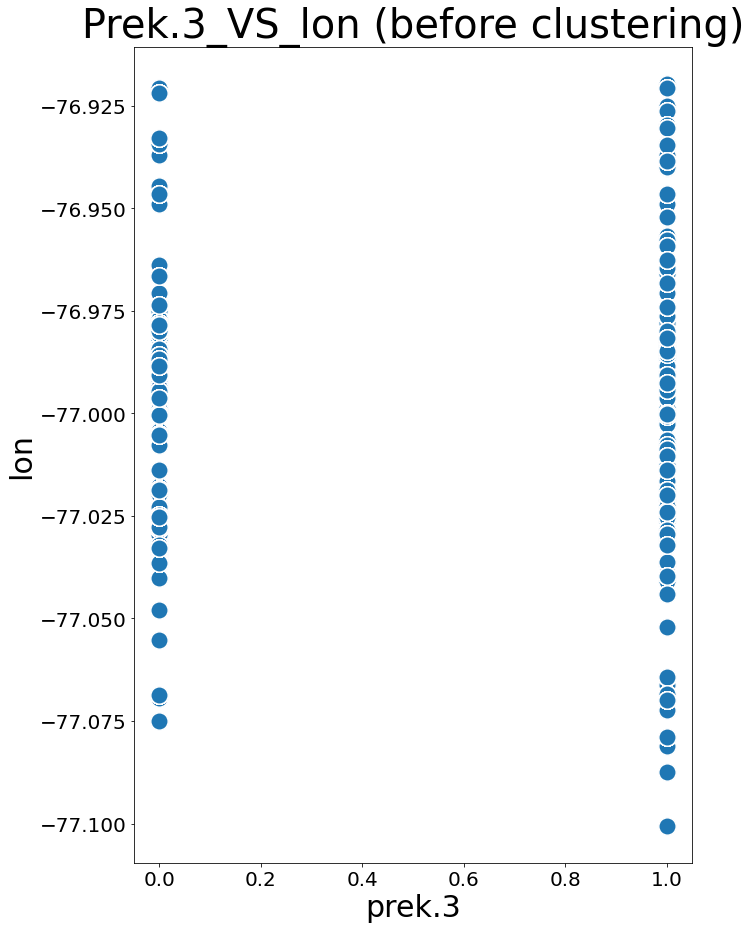

In [20]:
plt.figure(figsize=(10,15))
sns.scatterplot(data=newDataset,x='prek.3', y='lon',s=300)
plt.xlabel('prek.3',fontsize=30)
plt.ylabel('lon',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Prek.3_VS_lon (before clustering)", fontsize=40)

# Clustering with DBSAN

In [21]:
from sklearn.cluster import DBSCAN, KMeans

In [22]:
data_without_object = pd.concat([floatVar,boolVar],axis=1)
data_without_object.head()

,school_code,count,lon,lat,cluster_number,charter.status,prek.3,prek.4,preschool,kindergarten,...,grade.3,grade.4,grade.5,grade.6,grade.7,grade.8,grade.9,grade.10,grade.11,grade.12
0,1100,-1,-76.992532,38.833856,18,1,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0
1,1100,-1,-76.992532,38.833856,19,1,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0
2,1100,-1,-76.992532,38.833856,2,1,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0
3,1100,-1,-76.992532,38.833856,20,1,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0
4,1100,-1,-76.992532,38.833856,22,1,0,0,0,0,...,0,1,1,1,1,1,0,0,0,0


In [23]:
clustering =DBSCAN(eps=20, min_samples=16).fit(data_without_object)
clusters = clustering.labels_

len(set(clusters)) # ep=20, minsample 20 provided better silnouette score bout this does go with our 

9

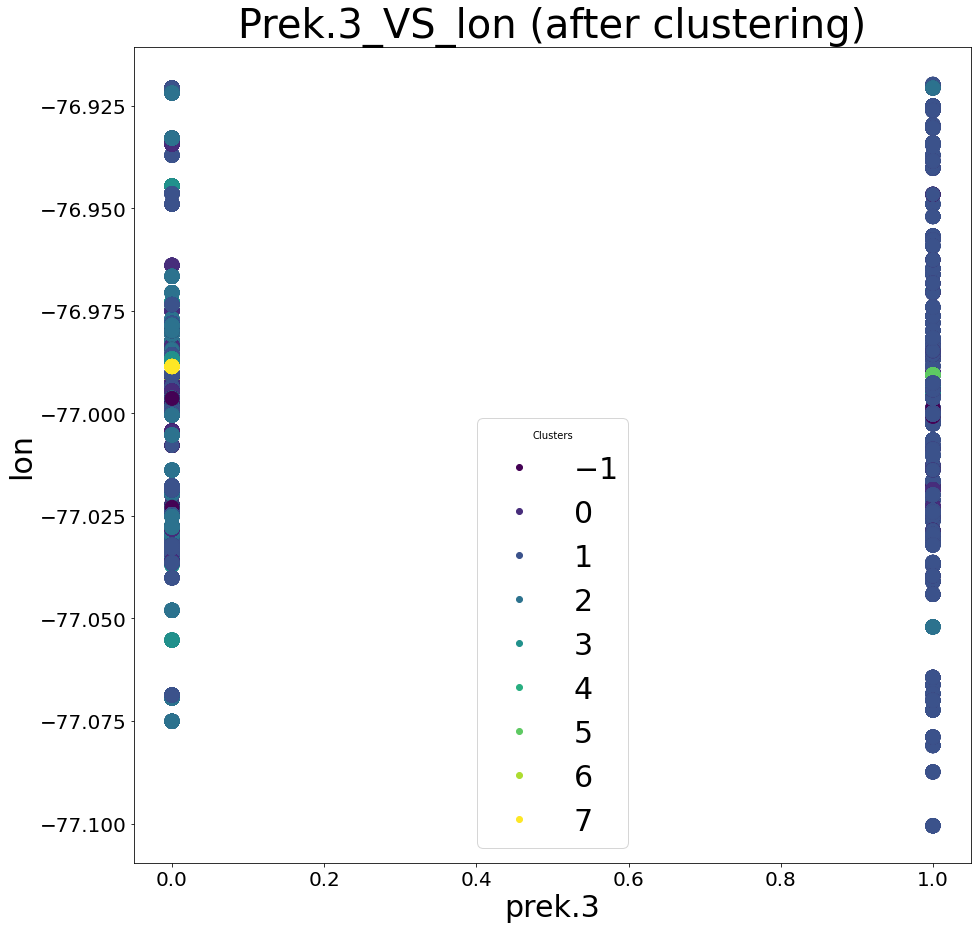

In [24]:


# Create scatter plot of data points, color-coded by cluster label

plt.figure(figsize=(15,15))
scatter = plt.scatter(data_without_object['prek.3'], data_without_object["lon"],s=200, c=clustering.labels_)
plt.xlabel('prek.3',fontsize=30)
plt.ylabel('lon',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Prek.3_VS_lon (after clustering)", fontsize=40)
legend = plt.legend(*scatter.legend_elements(), title="Clusters",fontsize=30)

plt.show()

# Measeuring usind Silohuette_score

In [25]:
from sklearn.metrics import silhouette_score

silhouette_score(data_without_object,clusters)

0.5710740807481025

## Deciding Optimal value for epsilon

In [26]:
from sklearn.neighbors import NearestNeighbors
sns.set()

NNmodel = NearestNeighbors(n_neighbors=2)
fit_dataset = NNmodel.fit(data_without_object)
distances,indices = fit_dataset.kneighbors(data_without_object)

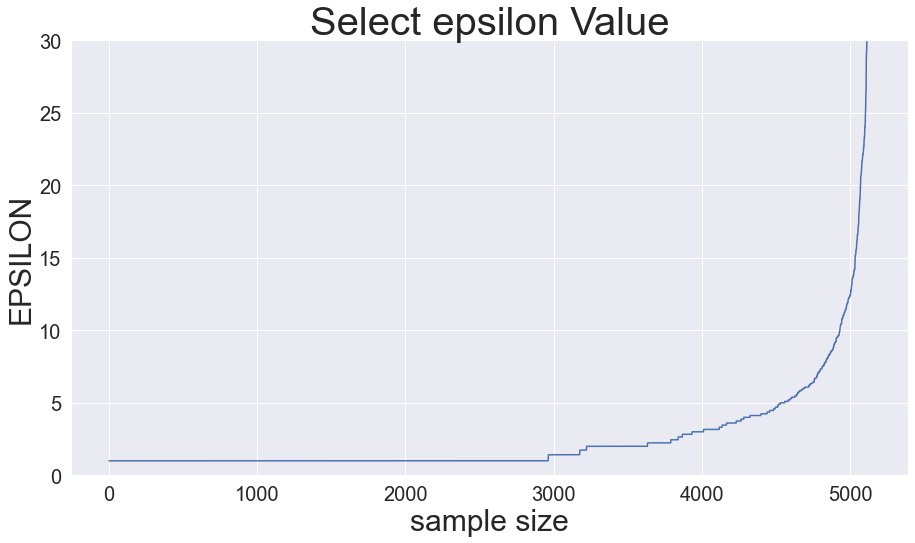

In [27]:
distances =np.sort(distances,axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.ylim(0,30)
plt.xlabel('sample size',fontsize=30)
plt.ylabel('EPSILON',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Select epsilon Value", fontsize=40)
plt.show()

# Clustering with KMEANS

In [40]:
kmeans_clustering = KMeans(n_clusters=2,random_state=0).fit(data_without_object)

## Choosing the right K(n_cluster)

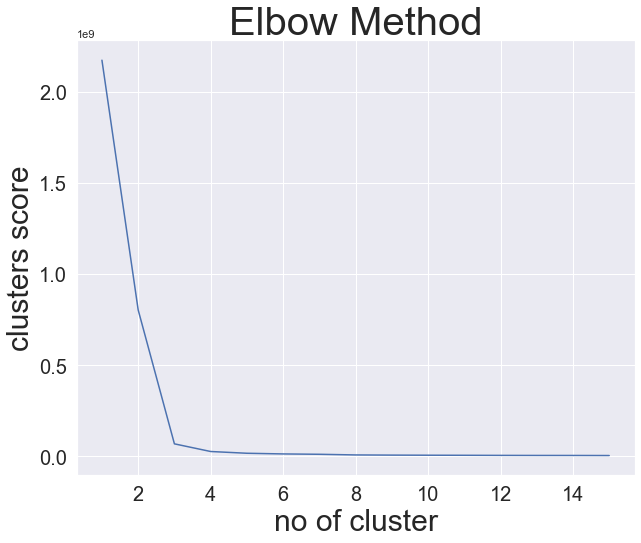

In [29]:
clusters_score = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(data_without_object)
    clusters_score.append(kmeans.inertia_)
    
    
    
plt.figure(figsize=(10,8))

plt.plot(range(1,16),clusters_score)

plt.xlabel("no of cluster",fontsize=30)
plt.ylabel('clusters score',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Elbow Method", fontsize=40)
plt.show()

In [30]:
clustersMean = kmeans_clustering.labels_

In [31]:
kmeans_clustering.cluster_centers_

array([[ 2.69054492e+02,  1.26369661e+01, -7.70033658e+01,
         3.89081644e+01,  2.35478645e+01,  3.53460972e-01,
         5.27000491e-01,  5.84683358e-01,  5.49582720e-01,
         6.09965636e-01,  5.98429062e-01,  5.98429062e-01,
         6.05547374e-01,  6.09474718e-01,  6.06774669e-01,
         4.00343643e-01,  3.67943054e-01,  3.60333824e-01,
         2.24349534e-01,  2.16249386e-01,  2.16249386e-01,
         2.05449190e-01],
       [ 3.06840000e+03,  3.55918367e+00, -7.69983938e+01,
         3.88913969e+01,  2.28693878e+01,  8.73469388e-01,
         1.22448980e-01,  2.48979592e-01,  6.00000000e-01,
         3.26530612e-01,  3.95918367e-01,  3.26530612e-01,
         3.26530612e-01,  1.26530612e-01,  2.81632653e-01,
         1.55102041e-01,  1.55102041e-01,  2.57142857e-01,
         1.75510204e-01,  7.34693878e-02,  7.34693878e-02,
         7.34693878e-02],
       [ 1.08475337e+03,  8.65889571e+00, -7.69975994e+01,
         3.88899347e+01,  2.35680982e+01,  8.07361963e-01,
    

In [39]:
silhouette_score(data_without_object,clustersMean)

0.8360975263514266

# Hierachical Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

## To know number of cluster in Hierachical model

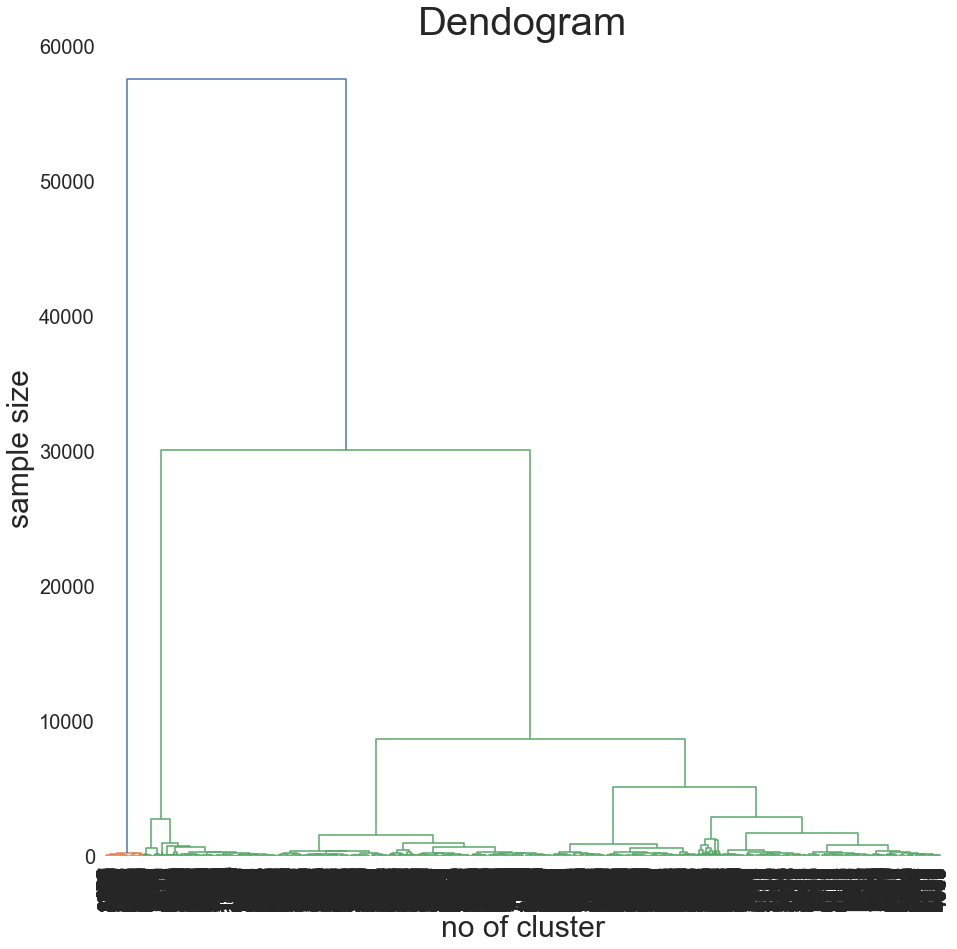

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,15))
dendogaram = sch.dendrogram(sch.linkage(data_without_object , method = 'ward'))

plt.plot(range(1,16),clusters_score)

plt.xlabel("no of cluster",fontsize=30)
plt.ylabel('sample size',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Dendogram", fontsize=40)
plt.show()

In [35]:
clusterHier = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward').fit_predict(data_without_object)
clusterHier

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
silhouette_score(data_without_object,clusterHier)

0.870764216715468

## Other ways to improve our cluster model

In [ ]:
#Normalize data
#Do PCA ineering
#more number records goes along way in clustering